# Group Project of NBA MVP 2021 prediction

#### Group memebrs:
##### Anuj Amin
##### Sam Murray
##### Brendan Zimmer

In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GroupKFold

## Data Exploration

In [2]:
df = pd.read_csv('train.csv')
current = pd.read_csv('current.csv')
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupKFold.html

In [3]:
df.head()

,Rank,Player,Age,Tm,Pts Won,Pts Max,Share,G,Team Wins,Overall Seed,...,3P%,FT%,WS,WS/48,VORP,BPM,G-Lockout,Wins-Lockout,WS-Lockout,VORP-Lockout
0,1,Kareem Abdul-Jabbar,32,LAL,147.0,221,0.665,82.0,60.0,2,...,0.000,0.765,14.8,0.227,6.8,6.7,NaN,NaN,NaN,NaN
1,2,Julius Erving,29,PHI,31.5,221,0.143,78.0,59.0,3,...,0.200,0.787,12.5,0.213,6.5,7.2,NaN,NaN,NaN,NaN
2,3,George Gervin,27,SAS,19.0,221,0.086,78.0,41.0,10,...,0.314,0.852,10.6,0.173,3.1,2.2,NaN,NaN,NaN,NaN
3,4,Larry Bird,23,BOS,15.0,221,0.068,82.0,61.0,1,...,0.406,0.836,11.2,0.182,5.4,5.3,NaN,NaN,NaN,NaN
4,5,Tiny Archibald,31,BOS,2.0,221,0.009,80.0,61.0,1,...,0.222,0.830,8.9,0.148,1.5,0.0,NaN,NaN,NaN,NaN


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

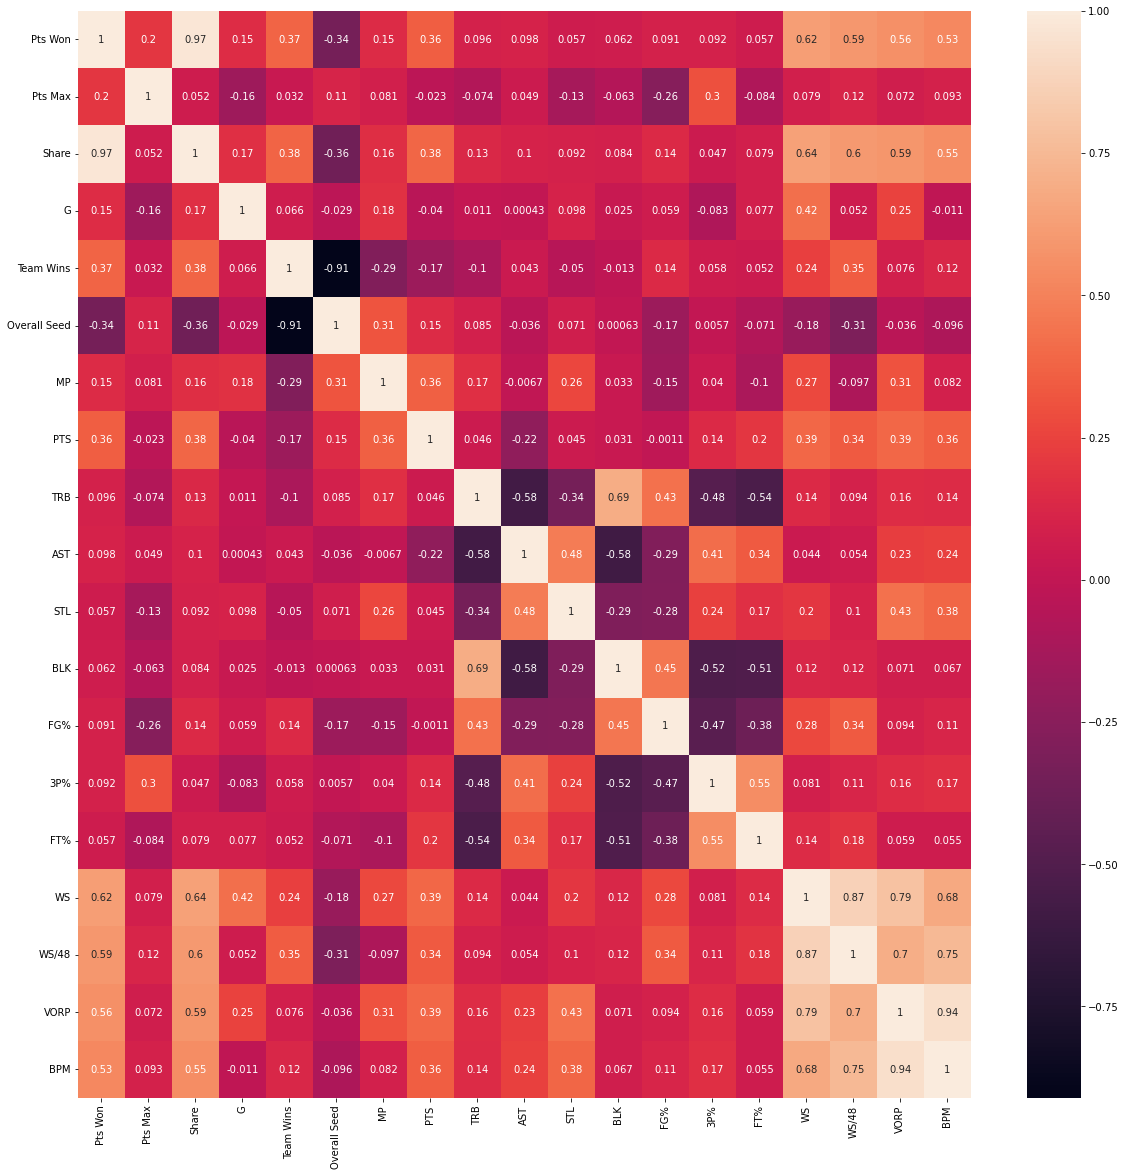

In [7]:
Compare = df[['Pts Won','Pts Max', 'Share', 'G','Team Wins','Overall Seed','MP','PTS','TRB','AST','STL','BLK','FG%','3P%','FT%','WS','WS/48','VORP','BPM']]
fig = plt.figure(figsize=(20, 20))
fig.set_facecolor('white')
sns.heatmap(Compare.corr(), annot=True)
plt.savefig("corr_matrix.png")

## RF regression

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [9]:
y = df['Share']
#names = ['Pts Won','Pts Max','G','Team Wins','Overall Seed','MP','PTS','TRB','AST','STL','BLK','FG%','3P%','FT%','WS','WS/48','VORP','BPM']

## pts one and points max have a lot of collinearity and shouldn't be included because they strongly effect our model (values used to derive our dependent variable)
## Team wins has been removed because of redundancy to overall seed
names = ['G','Overall Seed','MP','PTS','TRB','AST','STL','BLK','FG%','3P%','FT%','WS','VORP','BPM']
X = df[names]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [10]:
#print(y)

In [11]:
rf = RandomForestRegressor(n_estimators=500, criterion = 'mse')
rf.fit(X_train, y_train)

C:\Users\Brendan\Documents\Miniforge3\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse', n_estimators=500)

In [12]:
print(f"Train Accuracy: {rf.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {rf.score(X_test, y_test)*100:0.3f}%")

Train Accuracy: 93.927%
Test Accuracy: 55.499%


In [13]:
# Examining rf model 
y_pred = rf.predict(X_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, y_pred))
print('R2 score: %.3f' % r2_score(y_test, y_pred))

Mean squared error: 0.040
Mean absolute error: 0.147
R2 score: 0.555


## Feature importance via Random Forest Regression

In [14]:
importance = rf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01437
Feature: 1, Score: 0.16460
Feature: 2, Score: 0.02808
Feature: 3, Score: 0.07061
Feature: 4, Score: 0.02683
Feature: 5, Score: 0.03879
Feature: 6, Score: 0.01706
Feature: 7, Score: 0.01338
Feature: 8, Score: 0.02604
Feature: 9, Score: 0.03286
Feature: 10, Score: 0.02806
Feature: 11, Score: 0.36745
Feature: 12, Score: 0.07776
Feature: 13, Score: 0.09413


<BarContainer object of 14 artists>

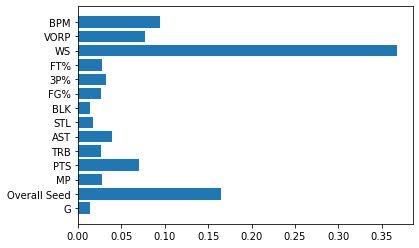

In [15]:
# plot feature importance
plt.barh(X_train.columns, rf.feature_importances_)
#plt.bar([x for x in range(len(importance))], importance)
#plt.show()

## Decision Tree Regression

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [17]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [18]:
print(f"Train Accuracy: {regr_1.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {regr_1.score(X_test, y_test)*100:0.3f}%")

Train Accuracy: 47.186%
Test Accuracy: 36.760%


In [19]:
y_pred = regr_1.predict(X_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, y_pred))
print('R2 score: %.3f' % r2_score(y_test, y_pred))

Mean squared error: 0.057
Mean absolute error: 0.181
R2 score: 0.368


## Improving Decision Tree Regressor via Grid Search

In [20]:
clf = DecisionTreeRegressor(random_state=1)

params = {
    'max_depth': [2, 3, 5, 7, 9],
    'min_samples_split': [2,3,4],
}

grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=2)

grid.fit(X_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_s

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=1), n_jobs=1,
             param_grid={'max_depth': [2, 3, 5, 7, 9],
                         'min_samples_split': [2, 3, 4]},
             verbose=2)

In [21]:
grid.best_score_
grid.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [22]:
print(f"Train Accuracy: {grid.best_estimator_.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {grid.best_estimator_.score(X_test, y_test)*100:0.3f}%")

Train Accuracy: 61.408%
Test Accuracy: 42.342%


In [23]:
y_pred = grid.predict(X_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, y_pred))
print('R2 score: %.3f' % r2_score(y_test, y_pred))
# include rmse!!!!!

Mean squared error: 0.052
Mean absolute error: 0.164
R2 score: 0.423


## Linear Regression (Base Model)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
linear = LinearRegression().fit(X_train, y_train) 
print(f"Train Accuracy: {linear.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {linear.score(X_test, y_test)*100:0.3f}%")

Train Accuracy: 58.484%
Test Accuracy: 57.537%


In [26]:
y_pred = linear.predict(X_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, y_pred))
print('R2 score: %.3f' % r2_score(y_test, y_pred))

Mean squared error: 0.038
Mean absolute error: 0.147
R2 score: 0.575


## Using Bagging

In [27]:
from sklearn.ensemble import BaggingRegressor

In [28]:
tree = DecisionTreeRegressor(random_state=1,
                              max_depth=None)


bag = BaggingRegressor(base_estimator=tree,
                        n_estimators=500,
                        oob_score=True,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=1,
                        random_state=1)

bag.fit(X_train, y_train)
    

print("OOB Accuracy: %0.2f" % bag.oob_score_)
print("Train Accuracy: %0.2f" % bag.score(X_train, y_train))
print("Test Accuracy: %0.2f" % bag.score(X_test, y_test))

OOB Accuracy: 0.56
Train Accuracy: 0.94
Test Accuracy: 0.56


In [29]:
y_pred = bag.predict(X_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, y_pred))
print('R2 score: %.3f' % r2_score(y_test, y_pred))

Mean squared error: 0.039
Mean absolute error: 0.144
R2 score: 0.562


## SVR

In [30]:
from sklearn.svm import SVR

In [31]:
svr = SVR(kernel = 'poly')
svr.fit(X_train, y_train)

print("Train Accuracy: %0.2f" % svr.score(X_train, y_train))
print("Test Accuracy: %0.2f" % svr.score(X_test, y_test))

Train Accuracy: 0.59
Test Accuracy: 0.59


In [32]:
y_pred = svr.predict(X_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, y_pred))
print('R2 score: %.3f' % r2_score(y_test, y_pred))

Mean squared error: 0.037
Mean absolute error: 0.140
R2 score: 0.593


## Trying AdaBoost

In [33]:
from sklearn.ensemble import AdaBoostRegressor

In [34]:
tree = DecisionTreeRegressor(random_state=1,
                              max_depth=None)

adaboost = AdaBoostRegressor(base_estimator=tree,
                           n_estimators=500,
                           learning_rate=1,
                           loss='linear',
                           random_state=1)

adaboost.fit(X_train, y_train)
    
    
print("Train Accuracy: %0.2f" % adaboost.score(X_train, y_train))
print("Test Accuracy: %0.2f" % adaboost.score(X_test, y_test))

Train Accuracy: 1.00
Test Accuracy: 0.58


In [35]:
y_pred = adaboost.predict(X_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, y_pred))
print('R2 score: %.3f' % r2_score(y_test, y_pred))

Mean squared error: 0.038
Mean absolute error: 0.131
R2 score: 0.580


## Trying Gradient Boosting (Original)

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
gboost = GradientBoostingRegressor(
    learning_rate=0.1,
    n_estimators=500,
    max_depth=5,
    random_state=1
    )

gboost.fit(X_train, y_train)
    
print("Training Accuracy: %0.2f" % gboost.score(X_train, y_train))
#print("Validation Accuracy: %0.2f" % boost.score(X_valid, y_valid))
print("Test Accuracy: %0.2f" % gboost.score(X_test, y_test))

Training Accuracy: 1.00
Test Accuracy: 0.52


In [38]:
y_pred = gboost.predict(X_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, y_pred))
print('R2 score: %.3f' % r2_score(y_test, y_pred))

Mean squared error: 0.043
Mean absolute error: 0.147
R2 score: 0.519


## Trying Gradient Boosting (XGBoost)

In [39]:
#!pip install xgboost

In [40]:
import numpy as np
import xgboost as xgb

xgboost = xgb.XGBRegressor()

xgboost.fit(X_train, y_train)
    
print("Training Accuracy: %0.2f" % xgboost.score(X_train, y_train))
#print("Validation Accuracy: %0.2f" % boost.score(X_valid, y_valid))
print("Test Accuracy: %0.2f" % xgboost.score(X_test, y_test))

Training Accuracy: 1.00
Test Accuracy: 0.50


In [41]:
y_pred = xgboost.predict(X_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, y_pred))
print('R2 score: %.3f' % r2_score(y_test, y_pred))

Mean squared error: 0.045
Mean absolute error: 0.150
R2 score: 0.505


## Trying Gradient Boosting (LightGBM)

In [42]:
#conda install -c conda-forge lightgbm

In [43]:
import lightgbm as lgb


lgboost = lgb.LGBMRegressor()

lgboost.fit(X_train, y_train)

print("Training Accuracy: %0.2f" % lgboost.score(X_train, y_train))
#print("Validation Accuracy: %0.2f" % boost.score(X_valid, y_valid))
print("Test Accuracy: %0.2f" % lgboost.score(X_test, y_test))

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
y_pred = lgboost.predict(X_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, y_pred))
print('R2 score: %.3f' % r2_score(y_test, y_pred))

## Trying Gradient Boosting (CatBoost)

In [44]:
#conda install -c conda-forge catboost

In [45]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor(verbose=0)

catboost.fit(X_train, y_train)


print("Training Accuracy: %0.2f" % catboost.score(X_train, y_train))
#print("Validation Accuracy: %0.2f" % boost.score(X_valid, y_valid))
print("Test Accuracy: %0.2f" % catboost.score(X_test, y_test))

ModuleNotFoundError: No module named 'catboost'

In [45]:
y_pred = catboost.predict(X_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, y_pred))
print('R2 score: %.3f' % r2_score(y_test, y_pred))

Mean squared error: 0.038
Mean absolute error: 0.141
R2 score: 0.574


## Predictions on the current dataset

In [46]:
from operator import itemgetter

In [47]:
currentCandidates = current.iloc[:,1] # get names of top 10 candidates for 2020-21 season
currentPredictors = current[['G','Overall Seed','MP','PTS','TRB','AST','STL','BLK','FG%','3P%','FT%','WS','VORP','BPM']]
#current.head()
y_test = pd.Series([0.961, 0.580, 0.449, 0.345,0.138,0.042,0.038,0.02,0.01, 0.008])
#currentReduced.head()
#currentCandidates

## Linear Regression

In [48]:
LinearPredict = linear.predict(currentPredictors)
#print(y_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, LinearPredict))
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, LinearPredict))
print('R2 score: %.3f' % r2_score(y_test, LinearPredict))

Mean squared error: 0.066
Mean absolute error: 0.226
R2 score: 0.297


In [49]:
linearPredict = linear.predict(currentPredictors).tolist()
for i,j in zip(currentCandidates,linearPredict):
    print(i,j)

Nikola Jokic 0.46072993933582623
Joel Embiid 0.29400192948507325
Stephen Curry 0.2081882211672541
Giannis Antetokounmpo 0.3398183765610586
Chris Paul -0.0769647883671522
Luka Doncic 0.3268503883748963
Damian Lillard 0.1788956327246235
Julius Randle 0.18638557500897796
Derrick Rose -0.2333047151427437
Rudy Gobert -0.16815615274770662


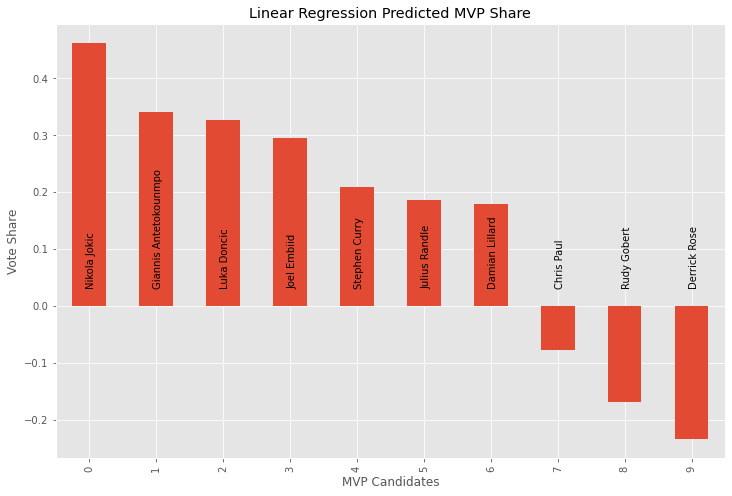

In [50]:
linearList = [[i,j] for i,j in zip(currentCandidates,linearPredict)]
#linearList = [row[1] for row in linearList]
linearList = sorted(linearList, key = itemgetter(1), reverse = True)
values = [row[1] for row in linearList]
values = pd.Series(values)
labels = [row[0] for row in linearList]

plt.style.use('ggplot')

plt.figure(figsize=(12, 8))
ax = values.plot(kind="bar")
ax.set_title("Linear Regression Predicted MVP Share")
ax.set_xlabel("MVP Candidates")
ax.set_ylabel("Vote Share")
rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 1.75, .03, label,
    ha='center', va='bottom', rotation = 'vertical', color = 'black')

plt.savefig('linreg.jpeg', dpi = 400)

plt.show()

## Random Forest

In [51]:
RFPredict = rf.predict(currentPredictors)
print("Mean squared error: %.3f" % mean_squared_error(y_test, RFPredict))
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, RFPredict))
print('R2 score: %.3f' % r2_score(y_test, RFPredict))

Mean squared error: 0.064
Mean absolute error: 0.193
R2 score: 0.310


In [52]:
RFPredict = rf.predict(currentPredictors).tolist()
for i,j in zip(currentCandidates,RFPredict):
    print(i,j)

Nikola Jokic 0.38717199999999985
Joel Embiid 0.16096400000000013
Stephen Curry 0.21304799999999963
Giannis Antetokounmpo 0.4266460000000006
Chris Paul 0.04377000000000003
Luka Doncic 0.1918859999999998
Damian Lillard 0.14385199999999987
Julius Randle 0.07394999999999997
Derrick Rose 0.05573799999999998
Rudy Gobert 0.17591999999999974


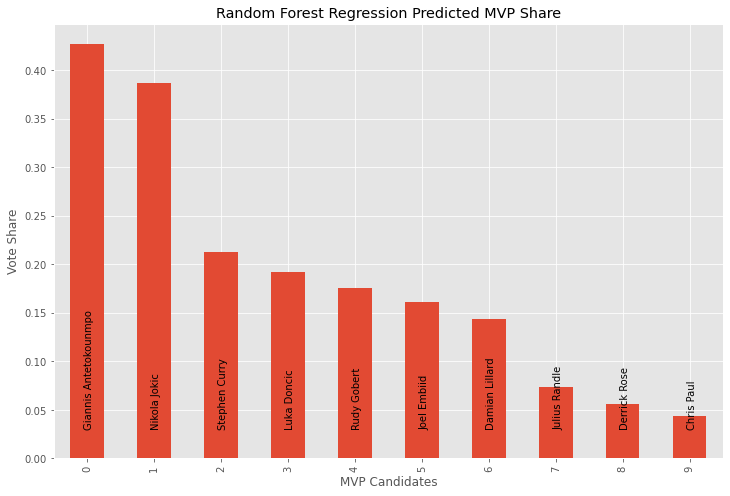

In [53]:
RFList = [[i,j] for i,j in zip(currentCandidates,RFPredict)]
#linearList = [row[1] for row in linearList]
RFList = sorted(RFList, key = itemgetter(1), reverse = True)
values = [row[1] for row in RFList]
values = pd.Series(values)
labels = [row[0] for row in RFList]

plt.style.use('ggplot')

plt.figure(figsize=(12, 8))
ax = values.plot(kind="bar")
ax.set_title("Random Forest Regression Predicted MVP Share")
ax.set_xlabel("MVP Candidates")
ax.set_ylabel("Vote Share")
rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 1.75, .03, label,
    ha='center', va='bottom', rotation = 'vertical', color = 'black')

plt.savefig('RFreg.jpeg', dpi = 400)

plt.show()

## Grid Search Regression Tree

In [54]:
GridPredict = grid.predict(currentPredictors)
print("Mean squared error: %.3f" % mean_squared_error(y_test, GridPredict))
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, GridPredict))
print('R2 score: %.3f' % r2_score(y_test, GridPredict))

Mean squared error: 0.056
Mean absolute error: 0.188
R2 score: 0.396


In [55]:
GridPredict = grid.predict(currentPredictors).tolist()
for i,j in zip(currentCandidates,GridPredict):
    print(i,j)

Nikola Jokic 0.5532142857142855
Joel Embiid 0.1698548387096774
Stephen Curry 0.0797757009345794
Giannis Antetokounmpo 0.1698548387096774
Chris Paul 0.0797757009345794
Luka Doncic 0.0797757009345794
Damian Lillard 0.0797757009345794
Julius Randle 0.0797757009345794
Derrick Rose 0.1698548387096774
Rudy Gobert 0.1698548387096774


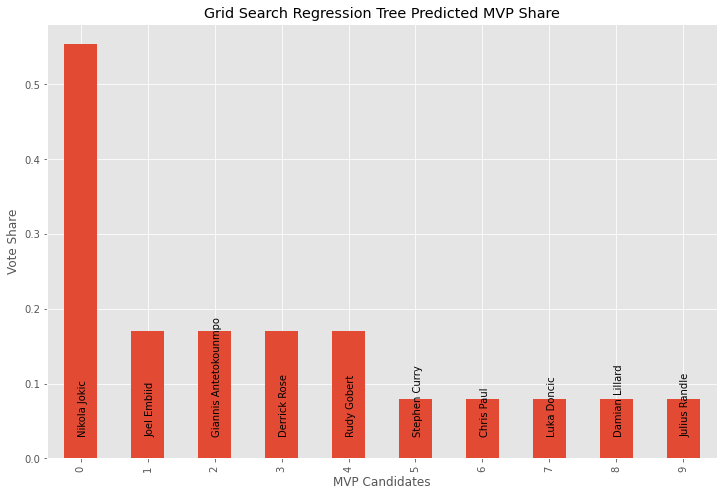

In [56]:
GridList = [[i,j] for i,j in zip(currentCandidates,GridPredict)]
#linearList = [row[1] for row in linearList]
GridList = sorted(GridList, key = itemgetter(1), reverse = True)
values = [row[1] for row in GridList]
values = pd.Series(values)
labels = [row[0] for row in GridList]

plt.style.use('ggplot')

plt.figure(figsize=(12, 8))
ax = values.plot(kind="bar")
ax.set_title("Grid Search Regression Tree Predicted MVP Share")
ax.set_xlabel("MVP Candidates")
ax.set_ylabel("Vote Share")
rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 1.75, .03, label,
    ha='center', va='bottom', rotation = 'vertical', color = 'black')

plt.savefig('grid.jpeg', dpi = 400)
plt.show()

## SVR

In [57]:
svrPredict = svr.predict(currentPredictors)
print("Mean squared error: %.3f" % mean_squared_error(y_test, svrPredict))
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, svrPredict))
print('R2 score: %.3f' % r2_score(y_test, svrPredict))

Mean squared error: 0.062
Mean absolute error: 0.201
R2 score: 0.339


In [58]:
svrPredict = svr.predict(currentPredictors).tolist()
for i,j in zip(currentCandidates,svrPredict):
    print(i,j)

Nikola Jokic 0.45020786166962057
Joel Embiid 0.1712650146518512
Stephen Curry 0.20889207809281676
Giannis Antetokounmpo 0.29190087207379856
Chris Paul -0.07455844162019074
Luka Doncic 0.2214352030914595
Damian Lillard 0.11080516506748087
Julius Randle 0.1244445752412249
Derrick Rose -0.1681555270150666
Rudy Gobert 0.06023502966269281


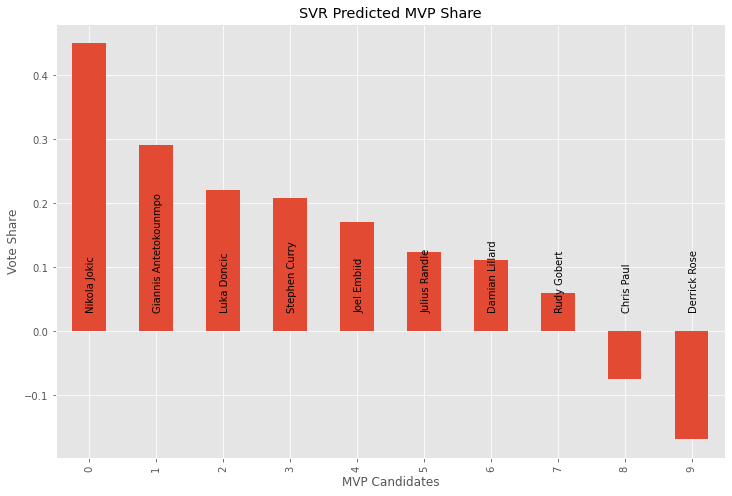

In [59]:
svrList = [[i,j] for i,j in zip(currentCandidates,svrPredict)]
#linearList = [row[1] for row in linearList]
svrList = sorted(svrList, key = itemgetter(1), reverse = True)
values = [row[1] for row in svrList]
values = pd.Series(values)
labels = [row[0] for row in svrList]

plt.style.use('ggplot')

plt.figure(figsize=(12, 8))
ax = values.plot(kind="bar")
ax.set_title("SVR Predicted MVP Share")
ax.set_xlabel("MVP Candidates")
ax.set_ylabel("Vote Share")
rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 1.75, .03, label,
    ha='center', va='bottom', rotation = 'vertical', color = 'black')

plt.savefig('svr.jpeg', dpi = 400)
plt.show()

## Bagging

In [60]:
BagPredict = bag.predict(currentPredictors)
print("Mean squared error: %.3f" % mean_squared_error(y_test, BagPredict))
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, BagPredict))
print('R2 score: %.3f' % r2_score(y_test, BagPredict))

Mean squared error: 0.062
Mean absolute error: 0.190
R2 score: 0.339


In [61]:
BagPredict = bag.predict(currentPredictors).tolist()
for i,j in zip(currentCandidates,BagPredict):
    print(i,j)

Nikola Jokic 0.4123339999999999
Joel Embiid 0.16139800000000024
Stephen Curry 0.20430399999999962
Giannis Antetokounmpo 0.41466400000000014
Chris Paul 0.04224200000000007
Luka Doncic 0.1903699999999998
Damian Lillard 0.13909799999999994
Julius Randle 0.06379800000000005
Derrick Rose 0.06815199999999998
Rudy Gobert 0.17526799999999984


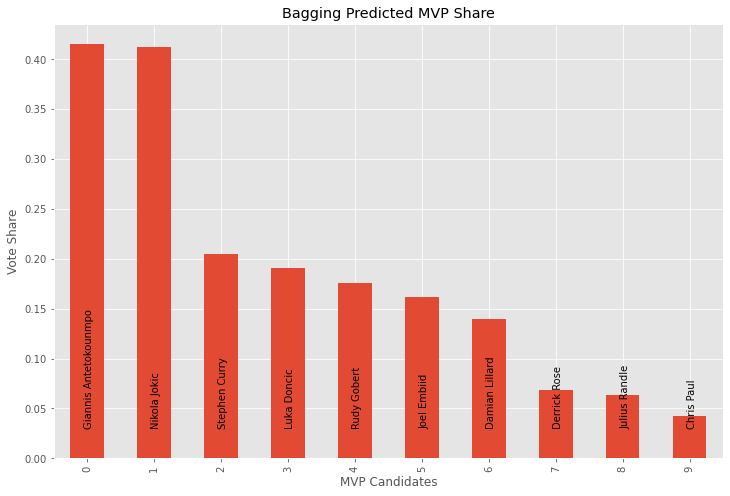

In [62]:
BagList = [[i,j] for i,j in zip(currentCandidates,BagPredict)]
#linearList = [row[1] for row in linearList]
BagList = sorted(BagList, key = itemgetter(1), reverse = True)
values = [row[1] for row in BagList]
values = pd.Series(values)
labels = [row[0] for row in BagList]

plt.style.use('ggplot')

plt.figure(figsize=(12, 8))
ax = values.plot(kind="bar")
ax.set_title("Bagging Predicted MVP Share")
ax.set_xlabel("MVP Candidates")
ax.set_ylabel("Vote Share")
rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 1.75, .03, label,
    ha='center', va='bottom', rotation = 'vertical', color = 'black')

plt.savefig('bag.jpeg', dpi = 400)
plt.show()

## Adaboost

In [63]:
AdaBoostPredict = adaboost.predict(currentPredictors)
print("Mean squared error: %.3f" % mean_squared_error(y_test, AdaBoostPredict))
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, AdaBoostPredict))
print('R2 score: %.3f' % r2_score(y_test, AdaBoostPredict))

Mean squared error: 0.077
Mean absolute error: 0.199
R2 score: 0.174


In [64]:
AdaBoostPredict = adaboost.predict(currentPredictors).tolist()
for i,j in zip(currentCandidates,AdaBoostPredict):
    print(i,j)

Nikola Jokic 0.33
Joel Embiid 0.112
Stephen Curry 0.173
Giannis Antetokounmpo 0.42
Chris Paul 0.022
Luka Doncic 0.173
Damian Lillard 0.117
Julius Randle 0.027000000000000007
Derrick Rose 0.032
Rudy Gobert 0.19


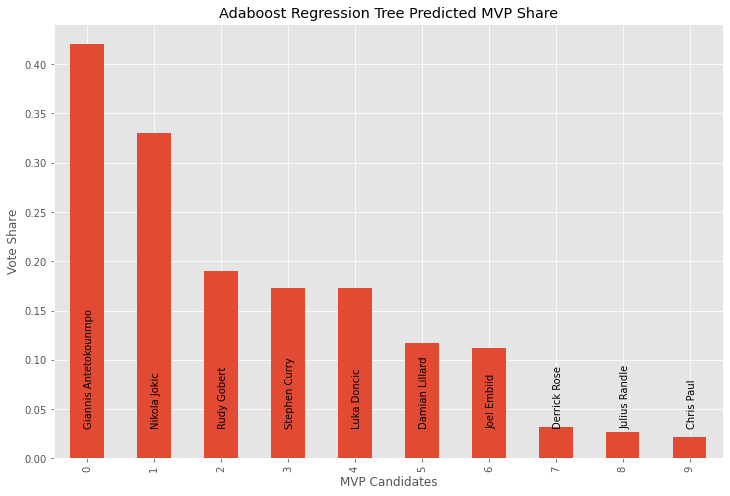

In [65]:
AdaList = [[i,j] for i,j in zip(currentCandidates,AdaBoostPredict)]
#linearList = [row[1] for row in linearList]
AdaList = sorted(AdaList, key = itemgetter(1), reverse = True)
values = [row[1] for row in AdaList]
values = pd.Series(values)
labels = [row[0] for row in AdaList]

plt.style.use('ggplot')

plt.figure(figsize=(12, 8))
ax = values.plot(kind="bar")
ax.set_title("Adaboost Regression Tree Predicted MVP Share")
ax.set_xlabel("MVP Candidates")
ax.set_ylabel("Vote Share")
rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 1.75, .03, label,
    ha='center', va='bottom', rotation = 'vertical', color = 'black')

plt.savefig('ada.jpeg', dpi = 400)
plt.show()

## Gradient Boosting

In [66]:
GBoostPredict = gboost.predict(currentPredictors)
print("Mean squared error: %.3f" % mean_squared_error(y_test, GBoostPredict))
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, GBoostPredict))
print('R2 score: %.3f' % r2_score(y_test, GBoostPredict))

Mean squared error: 0.051
Mean absolute error: 0.182
R2 score: 0.448


In [67]:
GBoostPredict = gboost.predict(currentPredictors).tolist()
for i,j in zip(currentCandidates,GBoostPredict):
    print(i,j)

Nikola Jokic 0.6401370831311808
Joel Embiid 0.14979963576271063
Stephen Curry 0.09617476617846525
Giannis Antetokounmpo 0.42534778279649543
Chris Paul 0.0017145932264855729
Luka Doncic 0.26929256909955807
Damian Lillard 0.16741853668500678
Julius Randle 0.061431092309850555
Derrick Rose 0.028028774115404016
Rudy Gobert 0.09026596911256889


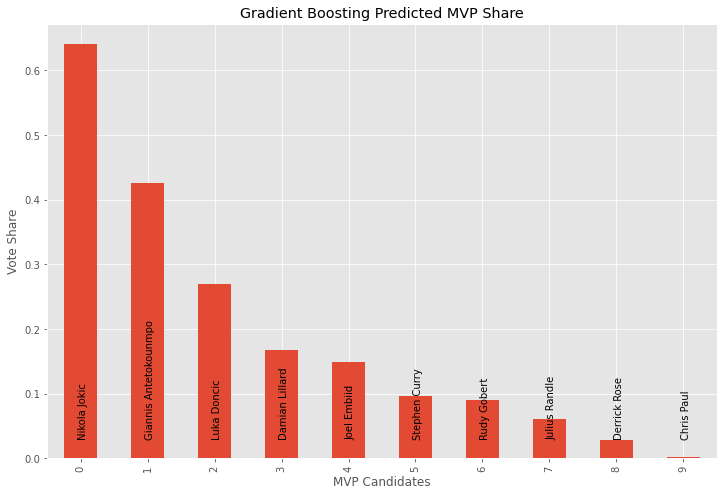

<Figure size 432x288 with 0 Axes>

In [68]:
GradList = [[i,j] for i,j in zip(currentCandidates,GBoostPredict)]
#linearList = [row[1] for row in linearList]
GradList = sorted(GradList, key = itemgetter(1), reverse = True)
values = [row[1] for row in GradList]
values = pd.Series(values)
labels = [row[0] for row in GradList]

plt.style.use('ggplot')

plt.figure(figsize=(12, 8))
ax = values.plot(kind="bar")
ax.set_title("Gradient Boosting Predicted MVP Share")
ax.set_xlabel("MVP Candidates")
ax.set_ylabel("Vote Share")
rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 1.75, .03, label,
    ha='center', va='bottom', rotation = 'vertical', color = 'black')

plt.show()

plt.savefig('gradient.jpeg', dpi = 400)

## XGBoost 

In [69]:
XGBoostPredict = xgboost.predict(currentPredictors)
print("Mean squared error: %.3f" % mean_squared_error(y_test, XGBoostPredict))
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, XGBoostPredict))
print('R2 score: %.3f' % r2_score(y_test, XGBoostPredict))

Mean squared error: 0.065
Mean absolute error: 0.190
R2 score: 0.299


In [70]:
XGBoostPredict = xgboost.predict(currentPredictors).tolist()
for i,j in zip(currentCandidates,XGBoostPredict):
    print(i,j)

Nikola Jokic 0.4750460684299469
Joel Embiid 0.1177448257803917
Stephen Curry 0.14603441953659058
Giannis Antetokounmpo 0.35713469982147217
Chris Paul 0.025237862020730972
Luka Doncic 0.2228616327047348
Damian Lillard 0.13411319255828857
Julius Randle 0.018469713628292084
Derrick Rose 0.01350331399589777
Rudy Gobert 0.24733372032642365


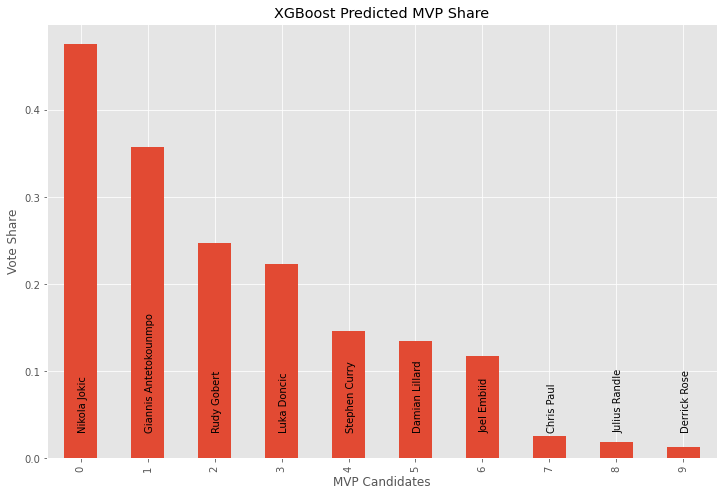

<Figure size 432x288 with 0 Axes>

In [71]:
XGList = [[i,j] for i,j in zip(currentCandidates,XGBoostPredict)]
#linearList = [row[1] for row in linearList]
XGList = sorted(XGList, key = itemgetter(1), reverse = True)
values = [row[1] for row in XGList]
values = pd.Series(values)
labels = [row[0] for row in XGList]

plt.style.use('ggplot')

plt.figure(figsize=(12, 8))
ax = values.plot(kind="bar")
ax.set_title("XGBoost Predicted MVP Share")
ax.set_xlabel("MVP Candidates")
ax.set_ylabel("Vote Share")
rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 1.75, .03, label,
    ha='center', va='bottom', rotation = 'vertical', color = 'black')

plt.show()

plt.savefig('xgb.jpeg', dpi = 400)

## LightGBM 

In [72]:
LGBoostPredict = lgboost.predict(currentPredictors)
print("Mean squared error: %.3f" % mean_squared_error(y_test, LGBoostPredict))
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, LGBoostPredict))
print('R2 score: %.3f' % r2_score(y_test, LGBoostPredict))

Mean squared error: 0.030
Mean absolute error: 0.124
R2 score: 0.681


In [73]:
LGBoostPredict = lgboost.predict(currentPredictors).tolist()
for i,j in zip(currentCandidates,LGBoostPredict):
    print(i,j)

Nikola Jokić 0.5132002930079628
Joel Embiid 0.5978329707621108
Giannis Antetokounmpo 0.38117546146516595
James Harden 0.2767717606853611
Damian Lillard 0.22114783756708872
LeBron James 0.22832173337493766
Luka Dončić 0.08685500036640478
Kawhi Leonard -0.005848270557008483
Kyrie Irving 0.16169883194967705
Rudy Gobert 0.1484426137315638


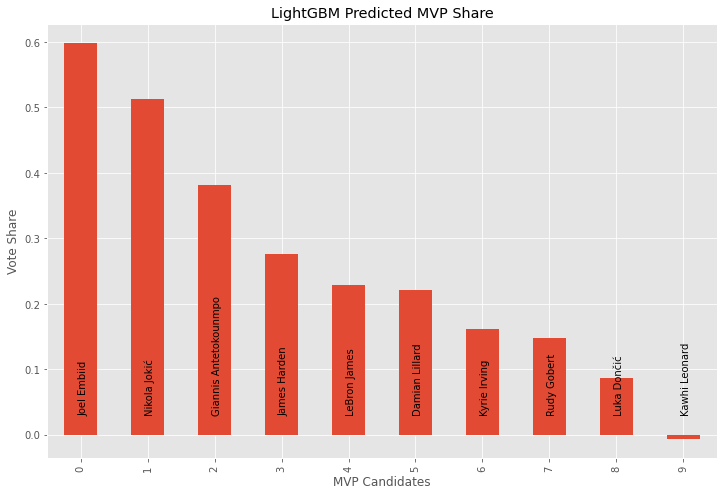

<Figure size 432x288 with 0 Axes>

In [74]:
LGList = [[i,j] for i,j in zip(currentCandidates,LGBoostPredict)]
#linearList = [row[1] for row in linearList]
LGList = sorted(LGList, key = itemgetter(1), reverse = True)
values = [row[1] for row in LGList]
values = pd.Series(values)
labels = [row[0] for row in LGList]

plt.style.use('ggplot')

plt.figure(figsize=(12, 8))
ax = values.plot(kind="bar")
ax.set_title("LightGBM Predicted MVP Share")
ax.set_xlabel("MVP Candidates")
ax.set_ylabel("Vote Share")
rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 1.75, .03, label,
    ha='center', va='bottom', rotation = 'vertical', color = 'black')

plt.show()

plt.savefig('light.jpeg', dpi = 400)

## CatBoost

In [75]:
CBoostPredict = catboost.predict(currentPredictors)
print("Mean squared error: %.3f" % mean_squared_error(y_test, CBoostPredict))
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, CBoostPredict))
print('R2 score: %.3f' % r2_score(y_test, CBoostPredict))

Mean squared error: 0.032
Mean absolute error: 0.141
R2 score: 0.652


In [76]:
CBoostPredict = catboost.predict(currentPredictors).tolist()
for i,j in zip(currentCandidates,CBoostPredict):
    print(i,j)

Nikola Jokić 0.5642802175190209
Joel Embiid 0.3625560840367251
Giannis Antetokounmpo 0.4923790407696109
James Harden 0.3230734326653887
Damian Lillard 0.2152938356447982
LeBron James 0.26153799990133225
Luka Dončić 0.1553953277182648
Kawhi Leonard 0.029297770360828118
Kyrie Irving 0.13531193138120895
Rudy Gobert 0.19137817664490822


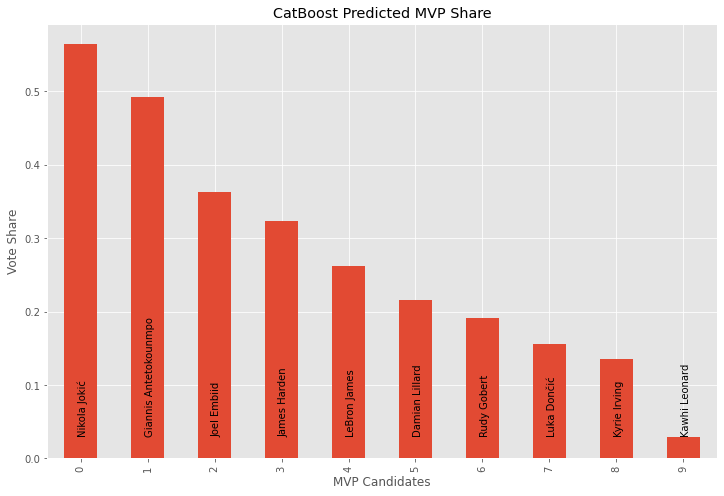

<Figure size 432x288 with 0 Axes>

In [77]:
CBList = [[i,j] for i,j in zip(currentCandidates,CBoostPredict)]
#linearList = [row[1] for row in linearList]
CBList = sorted(CBList, key = itemgetter(1), reverse = True)
values = [row[1] for row in CBList]
values = pd.Series(values)
labels = [row[0] for row in CBList]

plt.style.use('ggplot')

plt.figure(figsize=(12, 8))
ax = values.plot(kind="bar")
ax.set_title("CatBoost Predicted MVP Share")
ax.set_xlabel("MVP Candidates")
ax.set_ylabel("Vote Share")
rects = ax.patches
for rect, label in zip(rects,labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 1.75, .03, label,
    ha='center', va='bottom', rotation = 'vertical', color = 'black')

plt.show()

plt.savefig('cat.jpeg', dpi = 400)